<a href="https://colab.research.google.com/github/jackemcpherson/UsefulCodeSnippets/blob/master/Gradient_Boosting_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import Utility Packages#
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Import ML Packages#
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [0]:
#Load Data#
titanic = sns.load_dataset("titanic")

#Drop Redundant Cols#
titanic = titanic.drop(["who","deck","embark_town","adult_male","class","survived"],axis=1)

#Convert Non-Numeric Cols to Binary#
cat_cols = titanic[["alone","sex","embarked"]]
s = pd.get_dummies(cat_cols)
titanic = titanic.drop(["alone","sex","embarked"],axis=1)
titanic = pd.concat([titanic,s],axis=1)

#Fill NA values in Age#
titanic["age"] = titanic["age"].fillna(titanic["age"].median())

#Convert Target Values to Binary#
titanic["alive"] = titanic["alive"].replace("yes",1).replace("no",0)

In [0]:
#Split X (Values) and Y (Targets)#
X = titanic.drop("alive",axis=1)
y = titanic["alive"].values

In [0]:
#Scale Numeric Data#
X = StandardScaler().fit_transform(X)

In [0]:
#Break Out Train/Test Split#
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [0]:
#Fire up the Classifier#
clf = GradientBoostingClassifier()

In [7]:
#Fit to Data#
clf.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [8]:
#Test Model and print Accuracy#
y_pred = clf.predict(X_test)
clf.score(X_test, Y_test)

0.8770949720670391

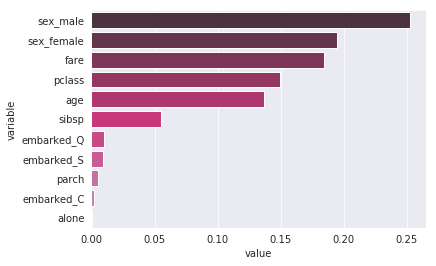

In [12]:
#Get Feature Importances#
sns.set_style("darkgrid")
feature_importances = pd.DataFrame(dict(zip(titanic.drop("alive",axis=1).columns,clf.feature_importances_)),index=[0]).melt()
sns.barplot(x="value",y="variable",data=feature_importances.sort_values("value",ascending=False),palette="PuRd_d")

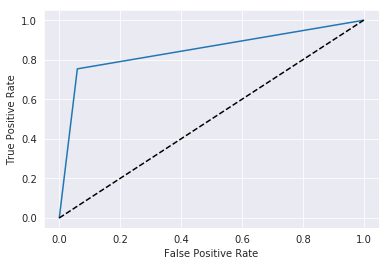

In [11]:
#Show ROC Curve#
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr,tpr)
plt.plot([0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()